In [3]:
%matplotlib inline
import numpy as np
import math
from skimage import io
from matplotlib import pylab as plt

In [14]:
def bresenham(x1, y1, x2, y2):
    x = x1
    y = y1
    points = []
    if x1 < x2:
        xi = 1
        dx = x2 - x1
    else:
        xi = -1
        dx = x1 - x2

    if y1 < y2:
        yi = 1
        dy = y2 - y1
    else:
        yi = -1
        dy = y1 - y1

    points.append([x,y])
    
    if dx > dy:
        ai = (dy - dx) * 2
        bi = dy * 2
        d = bi - dx
        while x != x2:
            if d >= 0:
                x += xi
                y += yi
                d += ai
            else:
                x += xi
                d += bi
            points.append([x,y])
    else:
        ai = (dx - dy) * 2
        bi = dx * 2
        d = bi - dy
        while y != y2:
            if d >= 0:
                x += xi
                y += yi
                d += ai
            else:
                y += yi
                d += bi
            points.append([x,y])

    return points

In [12]:
def sum_points(points, img):
    sumOfPoints = 0
    for point in points:
        sumOfPoints += img[point[0],point[1]]
    return sumOfPoints

In [13]:
def coordToCart(angle, cx, cy, radius):
    x = int(math.cos(math.radians(angle)) * (radius)) + cx
    y = int(math.sin(math.radians(angle)) * (radius)) + cy
    return x,y

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


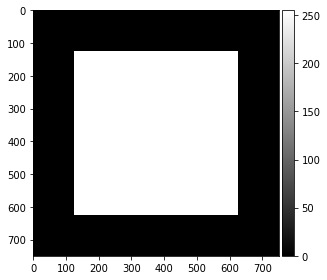

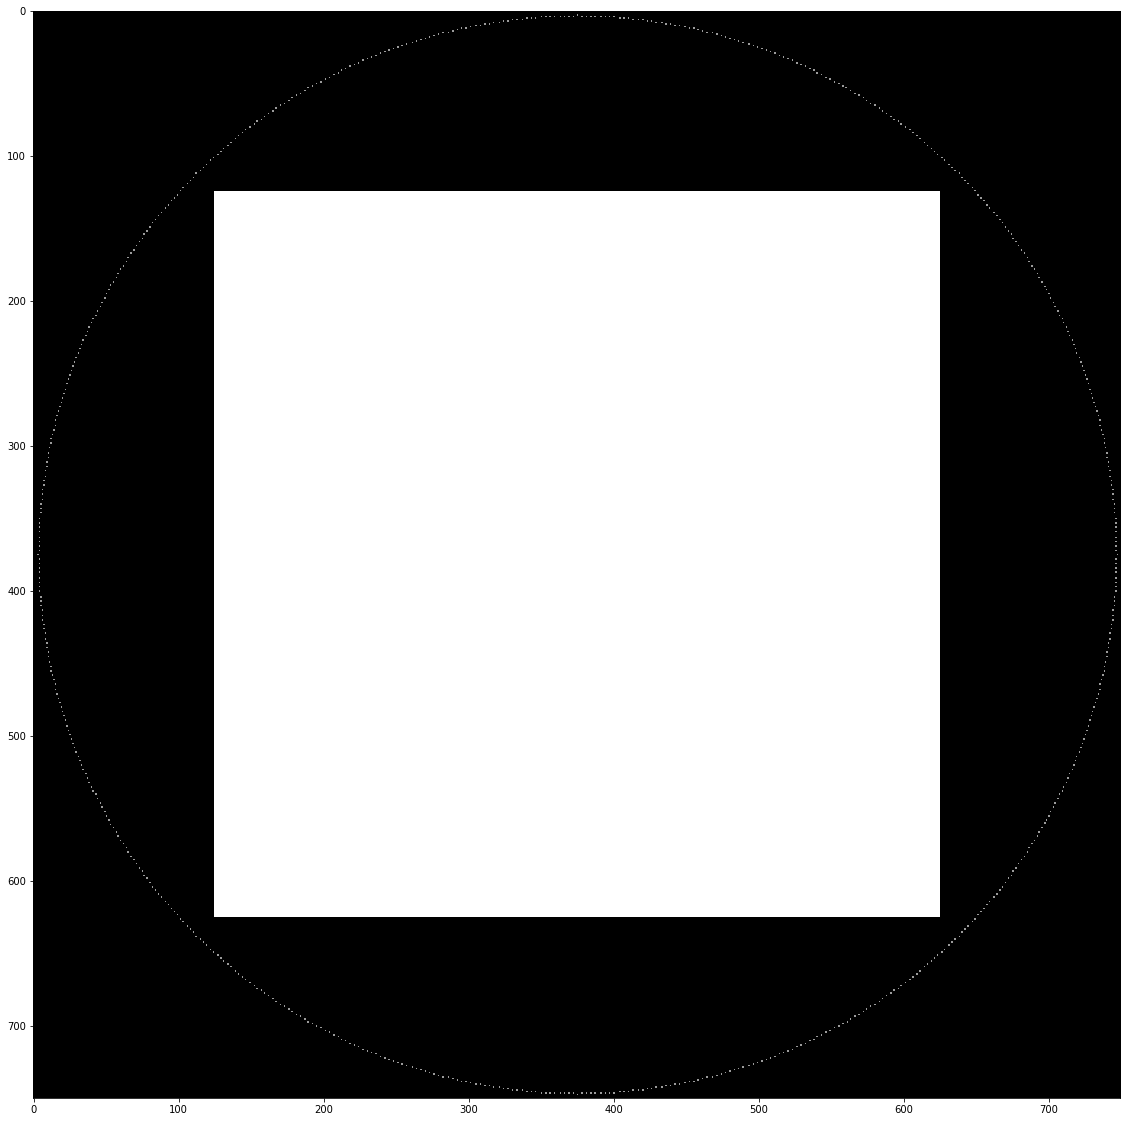

In [21]:
square_size = 500
square = np.zeros((square_size,square_size), dtype=np.float64)
#square[int(square_size/3):int(2*square_size/3), int(square_size/3):int(2*square_size/3)]=255
square[0:square_size,0:square_size] = 255

offset = int((int(square_size*1.5) - square_size)/2)
image = np.zeros((int(square_size*1.5),int(square_size*1.5)))
for i in range(square_size):
    for j in range(square_size):
        image[i+offset,j+offset]= square[i,j]
    

io.imshow(image, cmap='gray')

# Przyrost katów inc_angle emitera (położenie emitera), kąt z jakim wysyłane są fale (emiter_angle)
inc_angle, emiter_angle = 2, 15.0
beta = emiter_angle*2
centre = int(square_size*1.5/2)
detectors = 21
radius = centre-3

sinogram = np.zeros((int(360/inc_angle),detectors))

#petla - kazda pozycja emitera
for angle in range(0, 360, inc_angle):
    emiter_x, emiter_y = coordToCart(angle, centre, centre, radius)
    
   
    #petla - kazda pozycja detektora
    for a in range(detectors):
        alfa = angle + 180 - beta/2 + a*beta/(detectors-1)
        detx, dety = coordToCart(alfa, centre, centre, radius)
        image[detx,dety] = 155
        if dety < emiter_y:
            points = bresenham(detx, dety, emiter_x, emiter_y)
        else:
            points = bresenham(emiter_x, emiter_y, detx, dety)
        
        sinogram[int(angle/inc_angle),a] = sum_points(points, image)
        
#print( sinogram)
#print(square[0,0])
fig, ax = plt.subplots(figsize=(40,20))
ax.imshow(image, cmap='gray')
#ax.imshow(sinogram, cmap='gray')